In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.models import load_model
import cv2
from sklearn.metrics import confusion_matrix,precision_score,recall_score

In [5]:
def generate_VIA_Array(img) -> np.ndarray:
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    lower_yellow = np.array([20, 100, 200])
    upper_yellow = np.array([30, 255, 255])
    lower_orange = np.array([5, 50, 200])
    upper_orange = np.array([10, 255, 255])

    mask1 = cv2.inRange(hsv, lower_orange, upper_orange)
    mask2 = cv2.inRange(hsv, lower_yellow, upper_yellow)
    pixel_count1 = np.sum(mask1, axis=0)
    pixel_count2 = np.sum(mask2, axis=0)
    pixel_count = pixel_count1 + pixel_count2
    return pixel_count

In [12]:
flame_dir = "Flame_cropped/"
fire_dir = "Fire_full/"

def prep_img(file_path):
    IMG_SIZE = 150  # 50 in txt-based
    img_array = cv2.imread(file_path)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    via_array = generate_VIA_Array(new_array)
    return [new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3),np.array([via_array])]


In [8]:
flame_files = os.listdir(flame_dir)
fire_files = os.listdir(fire_dir)

model = load_model("64x2-CNN_impure_via.model")

[[754   1]
 [315 167]]
Precision:  0.9940476190476191
Recall:  0.34647302904564314


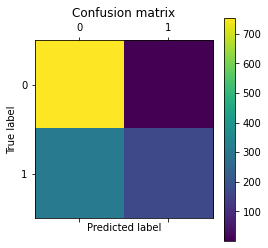

In [13]:
y_pred = []
y_true = []
for filename in flame_files:

    img = prep_img(flame_dir + filename)
    prediction = model.predict(img)
    y_pred.append(int(prediction[0][1]))
    y_true.append(1)  # 0 represents "flame" class

for filename in fire_files:
    img = prep_img(fire_dir + filename)
    prediction = model.predict(img)
    y_pred.append(int(prediction[0][1]))
    y_true.append(0)  # 1 represents "fire" class

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Predict the classes of the images


# Compute and plot the confusion matrix
cm = confusion_matrix(y_true, y_pred)
print(cm)
print("Precision: ",precision_score(y_true, y_pred))
print("Recall: ",recall_score(y_true, y_pred))
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

